In [27]:
import pandas as pd

In [28]:
df = pd.read_csv('/content/drive/MyDrive/Ad_Click_Update/ad_click_dataset.csv')

In [29]:
df.head()

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0


In [30]:
df.isnull().sum()

,0
id,0
full_name,0
age,4766
gender,4693
device_type,2000
ad_position,2000
browsing_history,4782
time_of_day,2000
click,0


In [31]:
df['gender'].fillna('unknown', inplace=True)
df['device_type'].fillna('unknown', inplace=True)
df['browsing_history'].fillna('unknown', inplace=True)
df['ad_position'].fillna('unknown', inplace=True)
df['time_of_day'].fillna('unknown', inplace=True)
df['age'].fillna(df['age'].median(), inplace=True)
df.isnull().sum()

,0
id,0
full_name,0
age,0
gender,0
device_type,0
ad_position,0
browsing_history,0
time_of_day,0
click,0


In [32]:
df.describe()

,id,age,click
count,10000.000000,10000.000000,10000.000000
mean,5060.211400,39.865000,0.650000
std,2861.758265,9.502445,0.476993
min,5.000000,18.000000,0.000000
25%,2529.000000,38.000000,0.000000
50%,5218.000000,39.500000,1.000000
75%,7466.000000,40.000000,1.000000
max,10000.000000,64.000000,1.000000


# Visualization and Insights

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

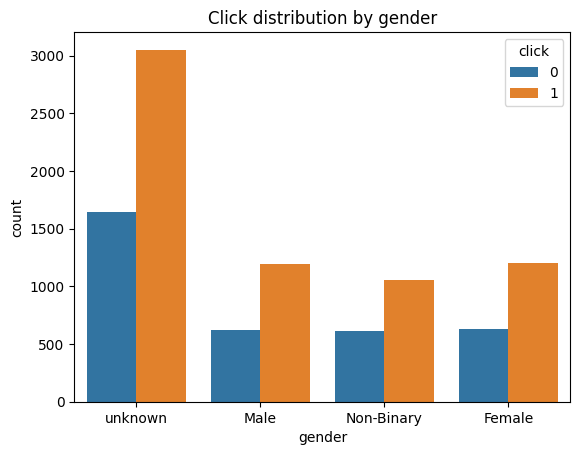

In [34]:
#Click rate by gender
sns.countplot(x='gender', hue='click', data=df)
plt.title('Click distribution by gender')
plt.show()


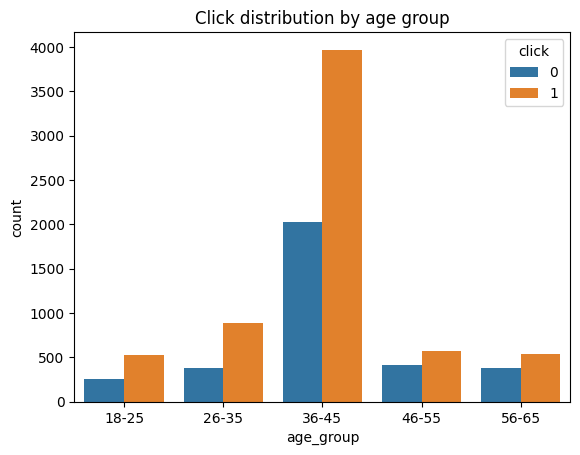

In [35]:
#Click rate by age group
df['age_group'] = pd.cut(df['age'], bins=[18, 25, 35, 45, 55, 65], labels=['18-25', '26-35', '36-45', '46-55', '56-65'])
sns.countplot(x='age_group', hue='click', data=df)
plt.title('Click distribution by age group')
plt.show()

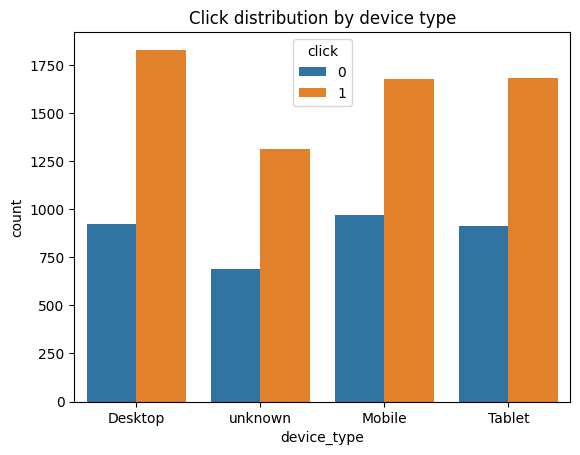

In [36]:
#Click Rate by divide type
sns.countplot(x='device_type', hue='click', data=df)
plt.title('Click distribution by device type')
plt.show()

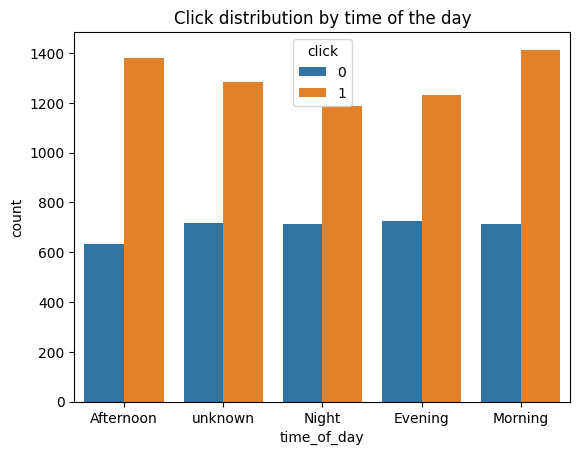

In [37]:
#Click rate by the time of the day
sns.countplot(x='time_of_day', hue='click', data=df)
plt.title('Click distribution by time of the day')
plt.show()

# Converting Categorical Data


In [38]:
df['gender'] = df['gender'].astype('category').cat.codes
df['device_type'] = df['device_type'].astype('category').cat.codes
df['ad_position'] = df['ad_position'].astype('category').cat.codes
df['time_of_day'] = df['time_of_day'].astype('category').cat.codes
df['browsing_history'] = df['browsing_history'].astype('category').cat.codes
df.head()

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click,age_group
0,670,User670,22.0,3,0,2,3,0,1,18-25
1,3044,User3044,39.5,1,0,2,5,4,1,36-45
2,5912,User5912,41.0,2,3,1,0,3,1,36-45
3,5418,User5418,34.0,1,3,3,1,1,1,26-35
4,9452,User9452,39.0,2,3,3,4,2,0,36-45


# Feature Engineering
Creating Interaction features
Creating new features by interacting with existing features

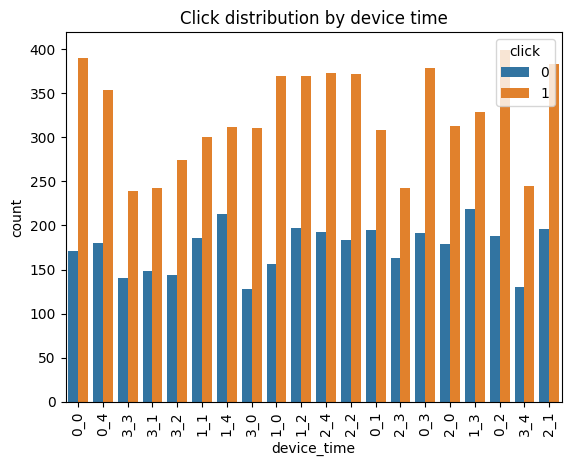

In [39]:
df['device_time'] = df['device_type'].astype(str)+'_'+df['time_of_day'].astype(str)
#Visualizing the new feature
sns.countplot(x='device_time', hue='click', data=df)
plt.title('Click distribution by device time')
plt.xticks(rotation=90)
plt.show()

# Predictive Modelling

In [40]:
df.drop(columns=['full_name'], inplace=True)
#One hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=['age_group','gender', 'device_time', 'ad_position', 'browsing_history'], drop_first=True)

from sklearn.model_selection import train_test_split
X = df_encoded.drop('click', axis=1)
y = df_encoded['click']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42  )
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 38) (2000, 38) (8000,) (2000,)


# Logistic Regression for Click Prediction

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [17]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
#Predictions
y_pred = lr.predict(X_test)
#Model Evaluations
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.6425
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.01      0.03       705
           1       0.65      0.98      0.78      1295

    accuracy                           0.64      2000
   macro avg       0.49      0.50      0.40      2000
weighted avg       0.54      0.64      0.52      2000

Confusion Matrix:
 [[  10  695]
 [  20 1275]]


# Key points in classification report

1. Class Imbalance:
 - The model performs very close in class 1 (precision:0.65, recall:0.99) but poorly on class 0 (precision:0.38, recall:0.01)
 - This indicates that model is biased towards predicting 1 and struggle to correctly classify instances 0.

2. Precision, Recall, F1 Score:
   - Precision for class 0: 0.38 (indicating that only 38% of predicted 0 instances are actually 0).
   - Recall for class 0: 0.01 (indicating that only 1% of actual 0 instances are correctly predicted).
   - F1-Score for class 0: 0.03, which is very low, suggesting that the model's ability to predict class 0 is very poor.
3. Confusion Matrix:
   - The model only correctly classified 10 instances of class 0, while misclassifying 695 instances as 1.
   - On the other hand, it correctly classified 1279 instances of class 1 and only misclassified 16 as 0.

In [42]:
#Handling Class Imbalance
lr_balanced = LogisticRegression(class_weight='balanced')
lr_balanced.fit(X_train, y_train)
#predictions
y_pred_balanced = lr_balanced.predict(X_test)
#Model Evaluations
print('Accuracy:', accuracy_score(y_test, y_pred_balanced))
print('Classification Report:\n', classification_report(y_test, y_pred_balanced))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_balanced))

Accuracy: 0.495
Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.56      0.44       705
           1       0.66      0.46      0.54      1295

    accuracy                           0.49      2000
   macro avg       0.51      0.51      0.49      2000
weighted avg       0.55      0.49      0.50      2000

Confusion Matrix:
 [[396 309]
 [701 594]]


In [44]:
#Using Resampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

lr_resampled = LogisticRegression()
lr_resampled.fit(X_resampled, y_resampled)
#Predictions
y_pred_resampled = lr_resampled.predict(X_test)
#Model Evaluations
print('Accuracy:', accuracy_score(y_test, y_pred_resampled))
print('Classification Report:\n', classification_report(y_test, y_pred_resampled))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_resampled))

Accuracy: 0.5425
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.48      0.42       705
           1       0.67      0.58      0.62      1295

    accuracy                           0.54      2000
   macro avg       0.53      0.53      0.52      2000
weighted avg       0.57      0.54      0.55      2000

Confusion Matrix:
 [[337 368]
 [547 748]]


#Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Classification Report:\n', classification_report(y_test, y_pred_rf))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_rf))


Accuracy: 0.769
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.51      0.61       705
           1       0.77      0.91      0.84      1295

    accuracy                           0.77      2000
   macro avg       0.76      0.71      0.72      2000
weighted avg       0.77      0.77      0.76      2000

Confusion Matrix:
 [[ 359  346]
 [ 116 1179]]


# XGBoost Classifier

In [46]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Apply SMOTE to balance classes
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#Initializing the XGBoost Model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_resampled, y_train_resampled)

#Predictions
y_pred_xgb = xgb_model.predict(X_test)

#Model Evaluations
print('Accuracy:', accuracy_score(y_test, y_pred_xgb))
print('Classification Report:\n', classification_report(y_test, y_pred_xgb))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_xgb))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:44:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8295
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.58      0.71       705
           1       0.81      0.97      0.88      1295

    accuracy                           0.83      2000
   macro avg       0.85      0.77      0.79      2000
weighted avg       0.84      0.83      0.82      2000

Confusion Matrix:
 [[ 409  296]
 [  45 1250]]


# Support Vector Machine(SVM)

In [47]:
from sklearn.svm import SVC
svm = SVC(class_weight='balanced', random_state=42)
svm.fit(X_train_resampled, y_train_resampled)
y_pred_svm = svm.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred_svm))
print('Classification Report:\n', classification_report(y_test, y_pred_svm))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_svm))

Accuracy: 0.4775
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.50      0.41       705
           1       0.63      0.46      0.53      1295

    accuracy                           0.48      2000
   macro avg       0.49      0.48      0.47      2000
weighted avg       0.53      0.48      0.49      2000

Confusion Matrix:
 [[356 349]
 [696 599]]


In [48]:
from sklearn.model_selection import GridSearchCV

param_grid ={
    'n_estimators' : [50, 100, 200],
    'max_depth' : [None, 10, 20],
    'min_samples_split' : [2, 5, 10]
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)
print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred_best_rf))
print('Classification Report:\n', classification_report(y_test, y_pred_best_rf))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_best_rf))





Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   1.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   1.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   1.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   3.7s
[CV] END max_depth=None, min_s

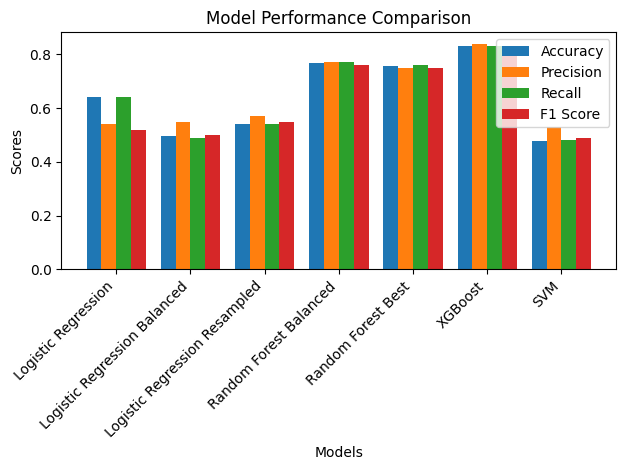

In [49]:
import numpy as np
models = [
    ('Logistic Regression', lr),
    ('Logistic Regression Balanced', lr_balanced),
    ('Logistic Regression Resampled', lr_resampled),
    ('Random Forest Balanced', rf),
    ('Random Forest Best', best_rf),
    ('XGBoost', xgb_model),
    ('SVM', svm)
]
accuracy = [0.6425, 0.495, 0.5425, 0.769, 0.7575, 0.8295, 0.4775]
precision = [0.54, 0.55, 0.57, 0.77, 0.75, 0.84, 0.53]
recall = [0.64, 0.49, 0.54, 0.77, 0.76, 0.83, 0.48]
f1_score = [0.52, 0.50, 0.55, 0.76, 0.75, 0.82, 0.49]

#Creating a bar plot
x = np.arange(len(models))
width = 0.2
plt.bar(x - 1.5*width, accuracy, width, label='Accuracy')
plt.bar(x - 0.5*width, precision, width, label='Precision')
plt.bar(x + 0.5*width, recall, width, label='Recall')
plt.bar(x + 1.5*width, f1_score, width, label='F1 Score')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(x, [model[0] for model in models], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


# Code for Visualizing Confusion Matrices

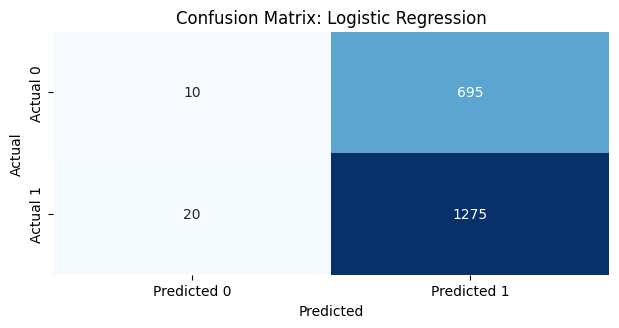

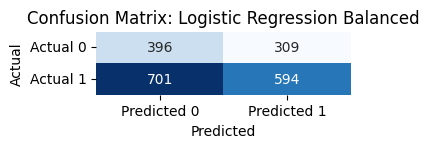

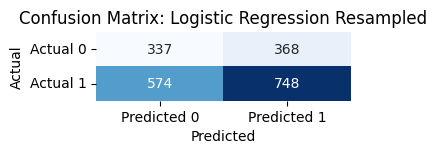

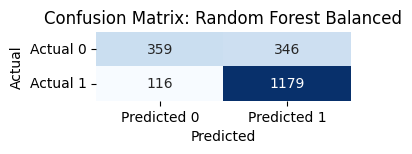

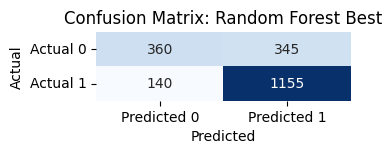

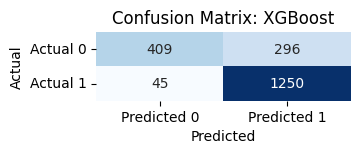

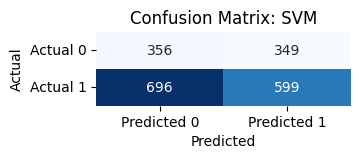

In [50]:
cm_logistic = [[10, 695], [20, 1275]] #Confusion matrix for Logistics Regression
cm_logistic_balanced = [[396, 309], [701, 594]] #Confusion matrix for Logistics Regression Balanced
cm_logistic_resampled = [[337, 368], [574, 748]] #Confusion matrix for Logistics Regression Resampled
cm_random_forest_balanced = [[359, 346], [116, 1179]] #Confusion matrix for Random Forest Balanced
cm_random_forest_best = [[360, 345], [140, 1155]] #Confusion matrix for Random Forest Best
cm_xgb = [[409, 296], [45, 1250]] #Confusion matrix for XGBoost
cm_svm = [[356, 349], [696, 599]] #Confusion matrix for SVM

models = [
    ('Logistic Regression', cm_logistic),
    ('Logistic Regression Balanced', cm_logistic_balanced),
    ('Logistic Regression Resampled', cm_logistic_resampled),
    ('Random Forest Balanced', cm_random_forest_balanced),
    ('Random Forest Best', cm_random_forest_best),
    ('XGBoost', cm_xgb),
    ('SVM', cm_svm),
]
#Plotting Confusion Matrices
plt.figure(figsize=(12, 12))
for i, (model_name, cm) in enumerate(models):
  plt.subplot(4, 2, i+1)
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
              xticklabels=['Predicted 0', 'Predicted 1'],
              yticklabels=['Actual 0', 'Actual 1'])
  plt.title(f"Confusion Matrix: {model_name}")
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.tight_layout()
  plt.show()

In [51]:
#Defining Confusion Matrix of each model
Confusion_matrices = [
    ('Logistic Regression', [[10, 695], [20, 1275]]),
    ('Logistic Regression Balanced', [[396, 309], [701, 594]]),
    ('Logistic Regression Resampled', [[337, 368], [574, 748]]),
    ('Random Forest Balanced', [[359, 346], [116, 1179]]),
    ('Random Forest Best', [[360, 345], [140, 1155]]),
    ('XGBoost', [[409, 296], [45, 1250]]),
    ('SVM', [[356, 349], [696, 599]]),
]
#Function to to calcualte tpr, fpr from a confusion matrix
def calculate_tpr_fpr(cm):
  TN, FP = cm[0]
  FN, TP = cm[1]

  #TPR(True Positive Rate)
  TPR = TP / (TP + FN)

  #FPR(False Positive Rate)
  FPR = FP / (FP + TN)

  return TPR, FPR
#Looping through models and calculate TPR, FPR
for model_name, cm in Confusion_matrices:
  tpr, fpr = calculate_tpr_fpr(cm)
  print(f"{model_name} - TPR: {tpr:.3f}, FPR:{fpr:.3f}")

Logistic Regression - TPR: 0.985, FPR:0.986
Logistic Regression Balanced - TPR: 0.459, FPR:0.438
Logistic Regression Resampled - TPR: 0.566, FPR:0.522
Random Forest Balanced - TPR: 0.910, FPR:0.491
Random Forest Best - TPR: 0.892, FPR:0.489
XGBoost - TPR: 0.965, FPR:0.420
SVM - TPR: 0.463, FPR:0.495


Random Forest Best: TPR (0.892), FPR (0.489) – High sensitivity, slightly lower than the balanced random forest. Slightly lower false positive rate, doing a better job at avoiding false positives while maintaining high sensitivity.

XGBoost: TPR (0.965), FPR (0.420) – Very high sensitivity, correctly identifying most positive instances. Lower false positive rate compared to other models, showing a good balance between detecting positives and minimizing false positives.

SVM: TPR (0.463), FPR (0.495) – Low sensitivity, missing many positive instances. Fairly high false positive rate, misclassifying almost half of the negative instances as positive.                               












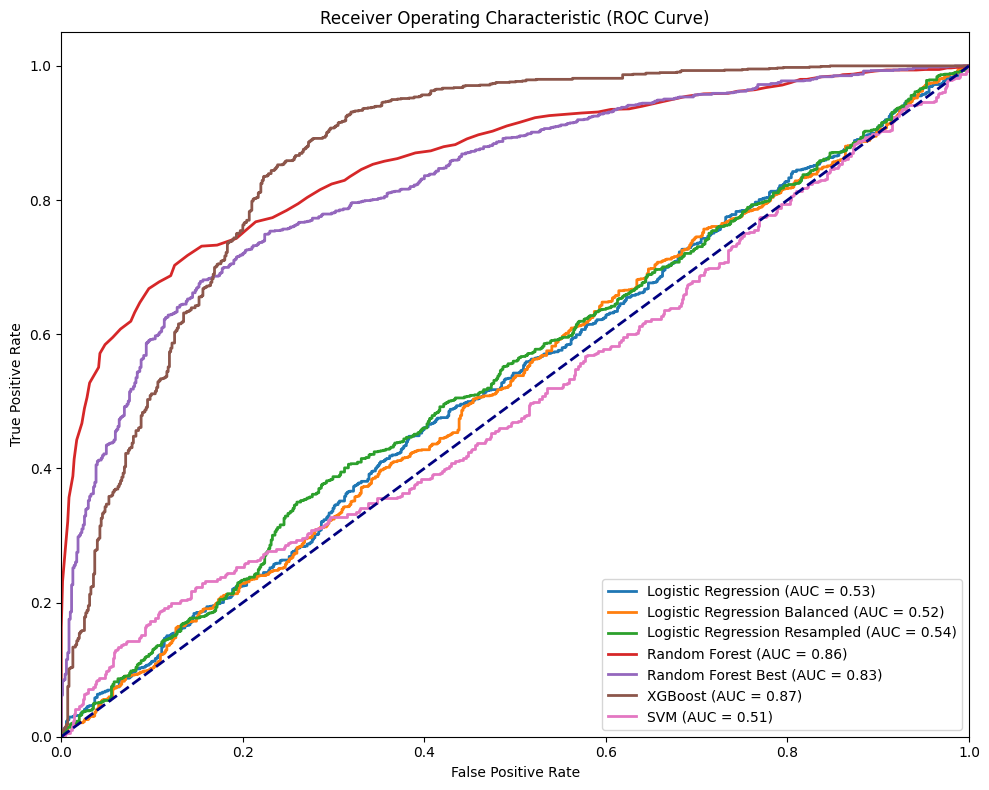

In [54]:
from sklearn.metrics import roc_curve, auc

#Get predicted probabilities or decision scores from each model
y_proba_lr = lr.predict_proba(X_test)[:, 1] #Probabilities for class 1
y_proba_lr_balanced = lr_balanced.predict_proba(X_test)[:, 1]
y_proba_lr_resampled = lr_resampled.predict_proba(X_test)[:, 1]
y_proba_rf = rf.predict_proba(X_test)[:, 1]
y_proba_rf_best = best_rf.predict_proba(X_test)[:, 1]
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_scores_svm = svm.decision_function(X_test) #Decision function for svm(no predict_proba)

#Dictionary to store model names and coreesponding predicted probabilities or decesion scores
models_proba = {
    'Logistic Regression': y_proba_lr,
    'Logistic Regression Balanced': y_proba_lr_balanced,
    'Logistic Regression Resampled': y_proba_lr_resampled,
    'Random Forest': y_proba_rf,
    'Random Forest Best': y_proba_rf_best,
    'XGBoost': y_proba_xgb,
    'SVM': y_scores_svm
}

#Plotting ROC Curve for each model
plt.figure(figsize  = (10, 8))
for model_name, y_proba in models_proba.items():
  fpr, tpr, _ = roc_curve(y_test, y_proba)
  roc_auc = auc(fpr, tpr)
  #Plotting the ROC curve
  plt.plot(fpr, tpr, lw=2, label='%s (AUC = %0.2f)' % (model_name, roc_auc))
#Plotting the random guessing line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC Curve)')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
